# **a) Dimensionality Reduction Techniques on Text Data**

Import libraries and set plot styles

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

Get and prepare data

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The full dataset contains 30 columns and 569 observations

In [4]:
df.shape

(569, 30)

# **1) PCA - Principal Component Analysis**

Apply PCA

Obtain the feature matrix

In [5]:
X = df.values
X.shape #it's 2D numpy array

(569, 30)

Standardize Features


In [6]:
from sklearn.preprocessing import StandardScaler

#create the object
scaler =  StandardScaler()

#calculate the mean and standard deviation
scaler.fit(X)

#transform the values
X_scaled = scaler.transform(X)

Choose the right number of dimensions (k)

First, apply PCA to all 30 features to check how well PCA captures the variance of the data.

In [7]:
from sklearn.decomposition import PCA

pca_30 = PCA(n_components = 30, random_state = 2020)
pca_30.fit(X_scaled)
X_pca_30 = pca_30.transform(X_scaled)

In [8]:
print('Variance of all 30 features = ', sum(pca_30.explained_variance_ratio_*100))

Variance of all 30 features =  100.00000000000001


Text(0, 0.5, 'Explained Variance')

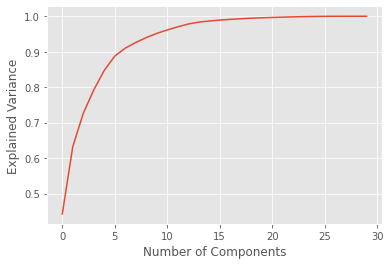

In [9]:
plt.plot(np.cumsum(pca_30.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
#plt.savfig('elbow_plot.png', dpi = 100)

In [10]:
print('Variance explained by the First PCs = ', np.cumsum(pca_30.explained_variance_ratio_ * 100)[0])
print('Variance explained by the First 2 PCs = ', np.cumsum(pca_30.explained_variance_ratio_ * 100)[1])
print('Variance explained by the First   5 PCs = ', np.cumsum(pca_30.explained_variance_ratio_ * 100)[4])
print('Variance explained by the First 10 PCs = ', np.cumsum(pca_30.explained_variance_ratio_ * 100)[9])

Variance explained by the First PCs =  44.27202560752632
Variance explained by the First 2 PCs =  63.24320765155942
Variance explained by the First   5 PCs =  84.73427431680723
Variance explained by the First 10 PCs =  95.15688143366667


Apply PCA by setting n_components = 2

In [11]:
pca_2 = PCA(n_components = 2, random_state = 2020)
pca_2.fit(X_scaled)
X_pca_2 = pca_2.transform(X_scaled)

Create a 2D scatter plot with 2 principal components

Text(0, 0.5, 'Second Principal Component')

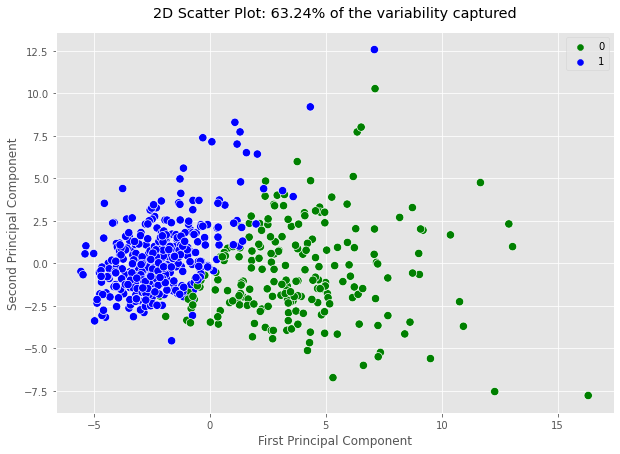

In [12]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = X_pca_2[:, 0], y = X_pca_2[:, 1], s = 70, hue = cancer.target, palette = ['green', 'blue'])

plt.title('2D Scatter Plot: 63.24% of the variability captured', pad = 15)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [49]:
import plotly.express as px

In [55]:
fig = px.scatter(X_pca_2[:, 0], X_pca_2[:, 1], color = cancer.target)
fig.show()

Reference: https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0

# **2) SVD - Single Value Decomposition**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [14]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

In [15]:
X = df.values
X.shape

(569, 30)

In [16]:
#Fitting the data in SVD class with 2 features
trun_svd =  TruncatedSVD(n_components = 29)
svd_29 = trun_svd.fit_transform(X)

In [17]:
 #Printing the transformed matrix
print("Transformed Matrix:")
print(svd_29[:3])

Transformed Matrix:
[[ 2.24197428e+03  3.47715560e+02 -2.75374194e+01  5.98014980e+01
   2.79839562e+01  5.42561548e+00  8.84223993e-01  1.97245695e-01
   8.10745991e-01  6.11362517e-01 -2.47776667e-01 -4.63043501e-03
   1.50989301e-02  2.97818050e-02 -1.42283274e-02  1.33689744e-02
  -2.36553378e-02  1.76403424e-02  2.56580143e-03  5.08260178e-02
   2.15961052e-02 -2.15386698e-03  2.67558584e-03  1.12157397e-02
   6.92582794e-03  1.41700082e-03 -7.84181430e-04 -1.16594110e-03
   1.97185893e-03]
 [ 2.37240840e+03  5.69016699e+01  2.38631619e+01 -4.85640643e+01
   1.15594993e+00 -3.82808242e+00  7.65376608e-02  1.45329977e-01
  -6.41004213e-01 -5.65459697e-02  2.63916533e-02  7.55838195e-02
   5.83916755e-02 -5.75307071e-03  2.16881140e-02 -3.19339298e-02
  -1.74105205e-03  1.23212574e-02  1.00755384e-02 -2.50923276e-02
   3.19086423e-03  2.32140595e-02  1.90794900e-03  6.61152749e-03
  -5.30444644e-03  1.10617253e-03  3.36626996e-03 -1.12515190e-03
   6.91005660e-04]
 [ 2.10184028e+03 

In [18]:
print('Variance of all 30 features = ', sum(trun_svd.explained_variance_ratio_*100))

Variance of all 30 features =  99.99999999983255


Text(0, 0.5, 'Explained Variance')

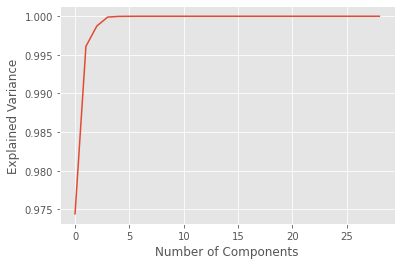

In [19]:
plt.plot(np.cumsum(trun_svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

In [20]:
print('Variance explained by the First PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[0])
print('Variance explained by the First 2 PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[1])
print('Variance explained by the First 5 PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[4])
print('Variance explained by the First 10 PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[9])

Variance explained by the First PCs =  97.44078146298295
Variance explained by the First 2 PCs =  99.60964378139724
Variance explained by the First 5 PCs =  99.99816980629338
Variance explained by the First 10 PCs =  99.99998842401686


Apply SVD by setting n_components = 2

In [21]:
trun_svd =  TruncatedSVD(n_components = 2)
A_transformed = trun_svd.fit_transform(df)

In [22]:
print("Transformed Matrix:")
print(A_transformed[:10])

Transformed Matrix:
[[ 2.24197428e+03  3.47715560e+02]
 [ 2.37240840e+03  5.69016699e+01]
 [ 2.10184028e+03  1.19476274e+01]
 [ 6.97432105e+02 -2.12770003e+00]
 [ 2.04708723e+03 -1.37765113e+02]
 [ 8.91188570e+02  2.66671573e+01]
 [ 1.92264430e+03  7.73491891e+01]
 [ 1.07723728e+03  3.70105110e+01]
 [ 9.14448040e+02 -9.86474634e+00]
 [ 8.65899558e+02  9.19698359e+00]]


In [57]:
fig = px.scatter(A_transformed[:, 0], A_transformed[:, 1], color = cancer.target)
fig.show()

In [23]:
print('Variance of all 30 features = ', sum(trun_svd.explained_variance_ratio_*100))

Variance of all 30 features =  99.60964378139735


# **3) LLE - Locally Linear Embedding**

In [24]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

In [25]:
df.shape

(569, 30)

In [26]:
X = df.values
X.shape #it's 2D numpy array

(569, 30)

In [27]:
from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components = 2)
X_transformed = embedding.fit_transform(X)



In [28]:
X_transformed.shape

(569, 2)

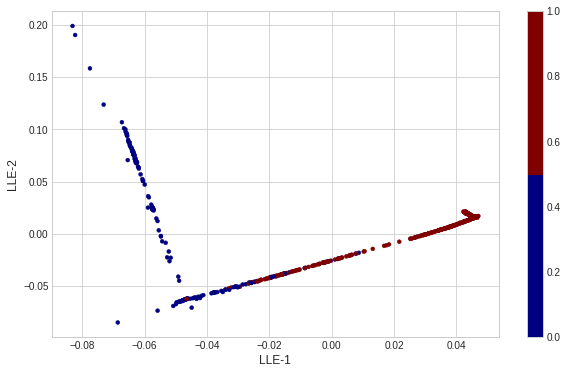

In [29]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s = 15,
            cmap = c_map , c = cancer.target)
plt.colorbar()
plt.xlabel('LLE-1') , plt.ylabel('LLE-2')
plt.show()

In [58]:
fig = px.scatter(X_transformed[:, 0], X_transformed[:, 1], color = cancer.target)
fig.show()

# **4) tSNE - t Distributed Stochastic Neighbor Embedding**

In [30]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

In [31]:
from sklearn.manifold import TSNE

X_embedded = TSNE().fit_transform(df)

In [32]:
X_embedded.shape

(569, 2)

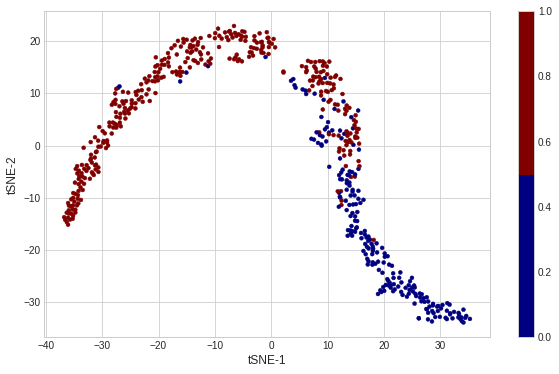

In [33]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 2)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s = 15,
            cmap = c_map , c = cancer.target)
plt.colorbar()
plt.xlabel('tSNE-1') , plt.ylabel('tSNE-2')
plt.show()

In [59]:
fig = px.scatter(X_embedded[:, 0], X_embedded[:, 1], color = cancer.target)
fig.show()

Here, after t-SNE for dimensions = 2, result is better in comparison to previous techniques as points are more scattered and visible and are not completely overlapped.

# **5) ISOMAP - Isometric Mapping**

In [34]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

In [35]:
from sklearn.manifold import Isomap

In [36]:
embedding = Isomap(n_components = 2)

In [37]:
X_transformed = embedding.fit_transform(X)

In [38]:
X_transformed.shape

(569, 2)

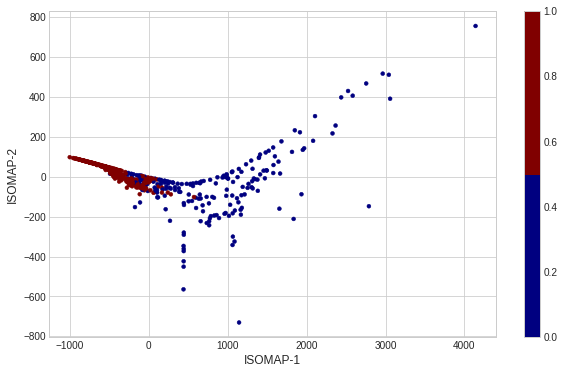

In [39]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s = 15,
            cmap = c_map , c = cancer.target)
plt.colorbar()
plt.xlabel('ISOMAP-1') , plt.ylabel('ISOMAP-2')
plt.show()

In [60]:
fig = px.scatter(X_transformed[:, 0], X_transformed[:, 1], color = cancer.target)
fig.show()

# **6) UMAP**

In [40]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 4.4 MB/s 
     |████████████████████████████████| 1.1 MB 42.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=bb3a9c0638144ec9c43178931b467afba597d34400b45c58471adcf097e70141
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=73523b4aa0199784df13608269c1bfab738c35d969385d60a13e3cc59ed71c47
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [41]:
import umap

In [42]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

In [43]:
trans = umap.UMAP(n_neighbors=5, random_state=42).fit(df)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


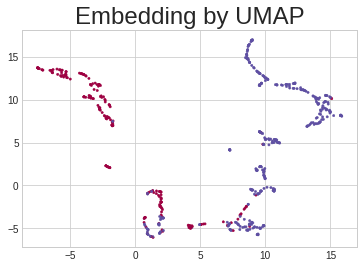

In [44]:
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 5, c = cancer.target, cmap = 'Spectral')
plt.title('Embedding by UMAP', fontsize=24);

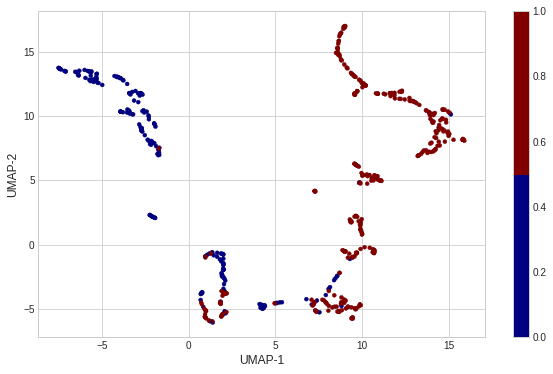

In [45]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 2)
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 15,
            cmap = c_map , c = cancer.target)
plt.colorbar()
plt.xlabel('UMAP-1') , plt.ylabel('UMAP-2')
plt.show()

In [61]:
fig = px.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], color = cancer.target)
fig.show()

# **Plots of all techniques**

In [46]:
#Importing the required libraries
from collections import OrderedDict
from functools import partial
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.decomposition import PCA



In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
data = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

LLE: 0.093 sec
t-SNE: 2.9 sec
UMAP: 2.3 sec
ISOMAP: 0.1 sec
SVD: 0.0033 sec
PCA: 0.003 sec


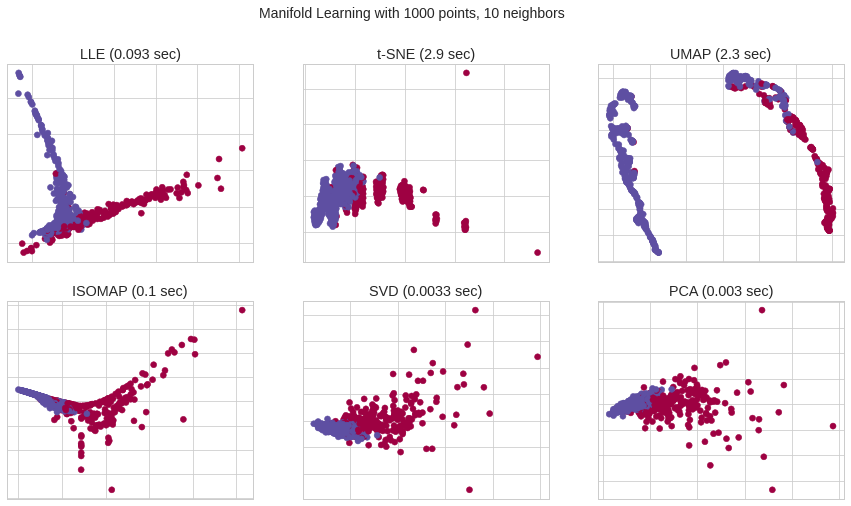

In [48]:
n_neighbors = 10
n_components = 2
# Creating the plot
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# Making a dictionary 'methods' containing LLE, t-SNE and PCA
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')
methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)
methods['UMAP'] = umap.UMAP(random_state=42)
methods['ISOMAP'] = Isomap(n_components = 2)
methods['SVD'] = TruncatedSVD(n_components = 2)
methods['PCA']=PCA(n_components=2)
# Plotting the results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(data)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 3, i + 1)
    ax.scatter(Y[:, 0], Y[:, 1], c=cancer.target, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
  
plt.show()

**Here, for the given dataset UMAP is the best one among all six techniques because more number of datapoints are seperable.**